<a href="https://colab.research.google.com/github/mcgmed/Tensorflow/blob/main/Introduction-to-Natural-Language-Processing/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
import string
import json
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

sentences = [] 
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

print(f'Length of sentences: {len(sentences)}')
print(f'Length of labels: {len(labels)}')
print(f'Length of urls: {len(urls)}')

--2022-11-26 17:42:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 172.217.164.176, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-11-26 17:42:10 (206 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

Length of sentences: 26709
Length of labels: 26709
Length of urls: 26709


In [6]:
training_size = 23000
vocab_size = 10000
max_length = 10
trunc_type='post'
padding_type='post'
oov_tok = ""
embedding_dim = 16

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token="")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding='post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding='post')
print(list(word_index.items())[:10])

[('', 1), ('new', 2), ('trump', 3), ('man', 4), ('not', 5), ('just', 6), ('will', 7), ('one', 8), ('year', 9), ('report', 10)]


In [7]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

[('former', 90), ('versace', 1), ('store', 44), ('clerk', 9), ('sues', 13), ('secret', 78), ('black', 230), ('code', 19), ('minority', 12), ('shoppers', 2)]
[('', 1), ('new', 2), ('trump', 3), ('man', 4), ('not', 5), ('just', 6), ('will', 7), ('one', 8), ('year', 9), ('report', 10)]
[('new', 1318), ('trump', 1117), ('man', 1075), ('not', 634), ('just', 501), ('will', 484), ('one', 469), ('year', 440), ('report', 434), ('area', 421)]


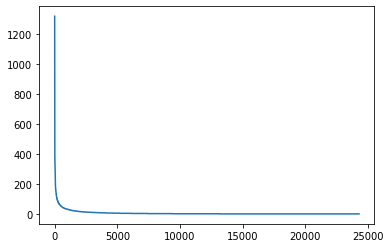

In [20]:
from collections import OrderedDict

wc = tokenizer.word_counts
print(list(wc.items())[:10])

newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(list(word_index.items())[:10])
print(list(newlist.items())[:10])
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

plt.plot(xs,ys)
plt.show()

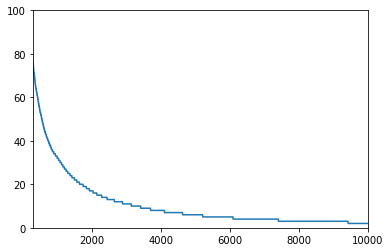

32
17


In [21]:
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


This much lower learning rate has a profound impact on the network. The lower learning rate can be seen in the first 10 epochs or so, where it appears that the network isn’t learning, before it “breaks out” and starts to learn quickly, and it also prevent overfitting.

In [16]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/100
719/719 [==============================] - 3s 4ms/step - loss: 0.6868 - accuracy: 0.5592 - val_loss: 0.6803 - val_accuracy: 0.5700
Epoch 2/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6802 - accuracy: 0.5596 - val_loss: 0.6711 - val_accuracy: 0.5700
Epoch 3/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6711 - accuracy: 0.5601 - val_loss: 0.6566 - val_accuracy: 0.6147
Epoch 4/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6540 - accuracy: 0.5789 - val_loss: 0.6362 - val_accuracy: 0.7204
Epoch 5/100
719/719 [==============================] - 3s 4ms/step - loss: 0.6259 - accuracy: 0.6587 - val_loss: 0.6052 - val_accuracy: 0.7387
Epoch 6/100
719/719 [==============================] - 3s 5ms/step - loss: 0.5901 - accuracy: 0.7214 - val_loss: 0.5715 - val_accuracy: 0.7530
Epoch 7/100
719/719 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7588 - val_loss: 0.5390 - val_accuracy: 0.7582

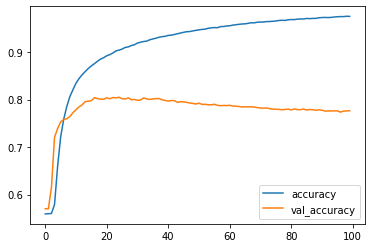

In [17]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['accuracy', 'val_accuracy']);

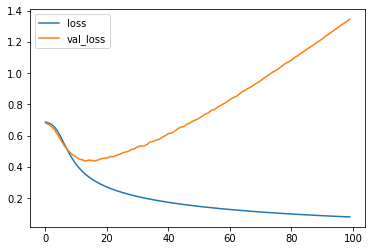

In [18]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['loss', 'val_loss']);

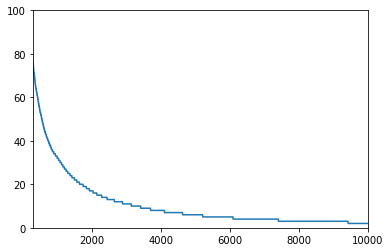

In [19]:
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()

reducing the size of the vocabulary to prevent the training set from overfitting on low-frequency words can work. You must reduce the 'vocab_size'.

For this example, an embedding dimension of 16 was arbitrarily chosen. In this instance words are encoded as vectors in 16-dimensional space, with their directions indicating their overall meaning. But is 16 a good number? With only two thousand words in our vocabulary it might be on the high side, leading to a high degree of sparseness of direction.

Best practice for embedding size is to have it be the fourth root of the vocab size. The fourth root of 2,000 is 6.687, so let’s explore what happens if we change the embedding dimension to 7 and retrain the model for 100 epochs.

In [22]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, 7),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 7)           70000     
                                                                 
 global_average_pooling1d_1   (None, 7)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                192       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 70,217
Trainable params: 70,217
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/100
719/719 [==============================] - 3s 3ms/step - loss: 0.6894 - accuracy: 0.5527 - val_loss: 0.6850 - val_accuracy: 0.5700
Epoch 2/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6846 - accuracy: 0.5596 - val_loss: 0.6802 - val_accuracy: 0.5700
Epoch 3/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6816 - accuracy: 0.5596 - val_loss: 0.6756 - val_accuracy: 0.5700
Epoch 4/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6773 - accuracy: 0.5597 - val_loss: 0.6687 - val_accuracy: 0.5724
Epoch 5/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6703 - accuracy: 0.5607 - val_loss: 0.6585 - val_accuracy: 0.6250
Epoch 6/100
719/719 [==============================] - 2s 3ms/step - loss: 0.6595 - accuracy: 0.5754 - val_loss: 0.6438 - val_accuracy: 0.6881
Epoch 7/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6445 - accuracy: 0.6230 - val_loss: 0.6254 - val_accuracy: 0.7269

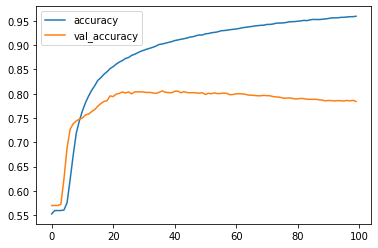

In [24]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['accuracy', 'val_accuracy']);

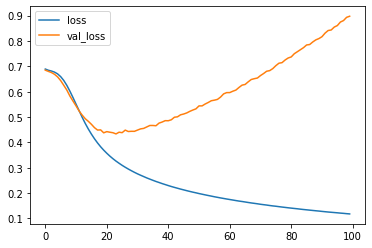

In [25]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['loss', 'val_loss']);

This isn’t much different from the results in Figure 6-6, but reducing the embedding dimensionality allows the model to train over 30% faster.

Let's use Dropout:

In [26]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, 7),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 7)           70000     
                                                                 
 global_average_pooling1d_2   (None, 7)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 8)                 64        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 70,073
Trainable params: 70,073
Non-trainable params: 0
__________________________________________________

In [27]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/100
719/719 [==============================] - 3s 3ms/step - loss: 0.6906 - accuracy: 0.5504 - val_loss: 0.6875 - val_accuracy: 0.5700
Epoch 2/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6868 - accuracy: 0.5596 - val_loss: 0.6832 - val_accuracy: 0.5700
Epoch 3/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6841 - accuracy: 0.5596 - val_loss: 0.6794 - val_accuracy: 0.5700
Epoch 4/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6740 - val_accuracy: 0.5710
Epoch 5/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6763 - accuracy: 0.5694 - val_loss: 0.6679 - val_accuracy: 0.5953
Epoch 6/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6691 - accuracy: 0.5951 - val_loss: 0.6578 - val_accuracy: 0.6705
Epoch 7/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6608 - accuracy: 0.6205 - val_loss: 0.6478 - val_accuracy: 0.7172

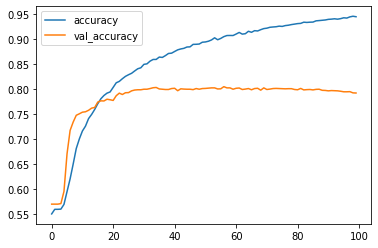

In [28]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['accuracy', 'val_accuracy']);

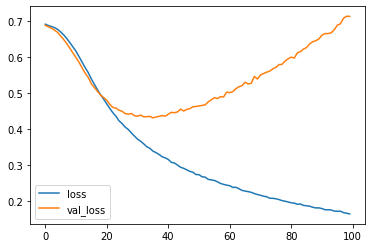

In [29]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['loss', 'val_loss']);

L1 regularization is often called lasso (least absolute shrinkage and selection operator) regularization. It effectively helps us ignore the zero or close-to-zero weights when calculating a result in a layer.

L2 regularization is often called ridge regression because it pushes values apart by taking their squares. This tends to amplify the differences between nonzero values and zero or close-to-zero ones, creating a ridge effect.

For NLP problems like the one we’re considering, L2 is most commonly used.

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 7)           70000     
                                                                 
 global_average_pooling1d_3   (None, 7)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 70,073
Trainable params: 70,073
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/100
719/719 [==============================] - 3s 3ms/step - loss: 0.7413 - accuracy: 0.5597 - val_loss: 0.7278 - val_accuracy: 0.5700
Epoch 2/100
719/719 [==============================] - 2s 2ms/step - loss: 0.7211 - accuracy: 0.5596 - val_loss: 0.7114 - val_accuracy: 0.5700
Epoch 3/100
719/719 [==============================] - 2s 2ms/step - loss: 0.7083 - accuracy: 0.5596 - val_loss: 0.7003 - val_accuracy: 0.5700
Epoch 4/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6994 - accuracy: 0.5596 - val_loss: 0.6926 - val_accuracy: 0.5700
Epoch 5/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5596 - val_loss: 0.6872 - val_accuracy: 0.5700
Epoch 6/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6888 - accuracy: 0.5596 - val_loss: 0.6832 - val_accuracy: 0.5700
Epoch 7/100
719/719 [==============================] - 2s 2ms/step - loss: 0.6855 - accuracy: 0.5596 - val_loss: 0.6797 - val_accuracy: 0.5697

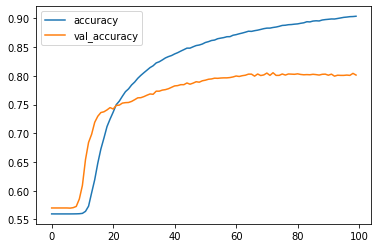

In [32]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['accuracy', 'val_accuracy']);

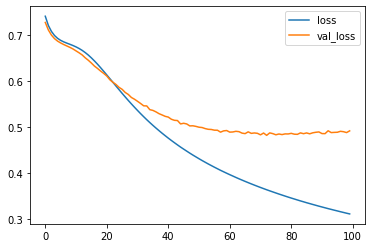

In [33]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['loss', 'val_loss']);

Let's try:

In [34]:
sentences = ["granny starting to fear spiders in the garden might be real",
             "game of thrones season finale showing this sunday night",
             "TensorFlow book will be a best seller"]

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 803, 1, 753, 1, 1, 1, 2592, 312, 1, 97], [123, 1, 1183, 160, 2646, 3236, 1, 1543, 152], [1, 235, 7, 1, 1, 47, 1]]


In [35]:
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)

[[   1  803    1  753    1    1    1 2592  312    1]
 [ 123    1 1183  160 2646 3236    1 1543  152    0]
 [   1  235    7    1    1   47    1    0    0    0]]


In [36]:
print(model.predict(padded))

1/1 [==============================] - 0s 85ms/step
[[0.99077743]
 [0.77637374]
 [0.31314534]]


### **Visualizing the Embeddings**

To visualize embeddings you can use a tool called the Embedding Projector. First, you’ll need a function to reverse the word index. It currently has the word as the token and the key as the value, but this needs to be inverted so we have word values to plot on the projector.

In [37]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 7)


In [38]:
print(reverse_word_index[2])
print(weights[2])

new
[ 0.13948366  0.21494687  0.25101152 -0.1911905  -0.20235692  0.18020362
  0.18635894]


So, the word “new” is represented by a vector with those seven coefficients on its axes.

The Embedding Projector uses two tab-separated values (TSV) files, one for the vector dimensions and one for metadata. This code will generate them for you:

In [39]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [41]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>